In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import seaborn as sns
import pandas as pd
import os

from XPCS_tools import E2lambda, lambda2E, theta2Q, Q2theta, decorrelation_f
# fit_out and intensities folders
from folder_paths import *

ModuleNotFoundError: No module named 'XPCS_tools'

#### Load fit parameters and scan infos

In [ ]:
### LOAD SCAN_INFO.CSV ###

# get file names
Idt_files = os.listdir(It_folder)
Idt_files.sort()
Idt_files = [f for f in Idt_files if f.startswith('Idt')]


# load data
Idts = {}
for f in Idt_files:
    # read npz file with numpy
    Idts[f[4:-4]] = np.load(os.path.join(It_folder, f), allow_pickle=True)

Ta2O5_2.5um_0002_0004_Q=2.0_dq=0.01
Ta2O5_2.5um_0003_0009_Q=2.0_dq=0.01


#### Dose rate definition

In [ ]:
A = {8.67: np.pi*7*5, 21.67: np.pi*5.2*4.4, 15.875: np.pi*7.1*3.7}

# density of Ta2O5
rho = 7.3 * 10**(-4*3) * 10**(-3) # kg/um^3

# Photon flux
phi = {8.67: 2.1e12, 21.67: 8.3e11, 15.875: 9.3e11}

# attenuation length
la = {8.67: 12.6066, 21.67: 33.7434, 15.875: 'x'}

dose_rate= lambda E, d: phi[E]*(1-np.exp(-d/la[E]))*(E*1.6022e-16)/(rho*A[E]*d)

### to be continued ........

In [36]:
It_avg = pd.DataFrame(columns=['ID_sample', 'T', 'It_avg', 'It_std'])

### GeO2_6 Temperature dependence

/home/fabio2b/anaconda3/envs/XPCSenv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/fabio2b/anaconda3/envs/XPCSenv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/fabio2b/anaconda3/envs/XPCSenv/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/fabio2b/anaconda3/envs/XPCSenv/lib/python3.13/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/fabio2b/anaconda3/envs/XPCSenv/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


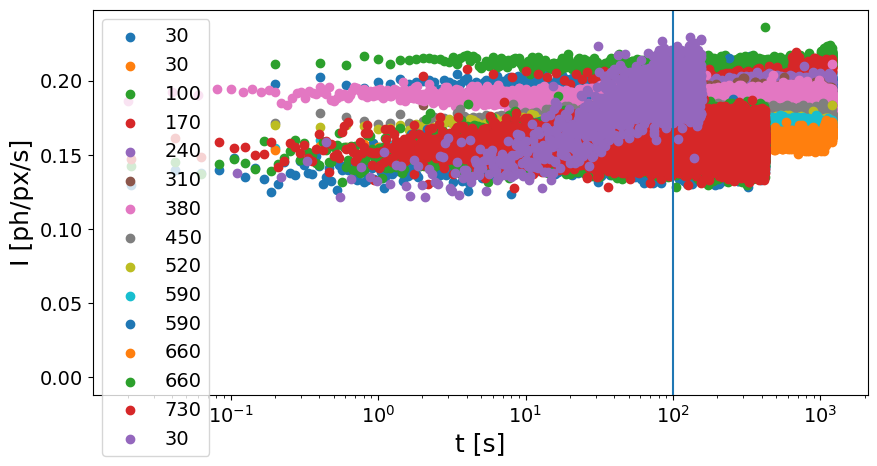

In [37]:
damage_th = 1e2

#################################################
idx_6 = scan_info[(scan_info.ID_sample==6) & (scan_info['Q']==.19) & (scan_info['test']!=True)].index
#################################################

plt.figure(figsize=(10, 5))
for idx in idx_6:
    t_It = Idts[idx]['t_It']
    It = Idts[idx]['It']
    It_avg.loc[idx] = [scan_info.loc[idx].ID_sample, scan_info.loc[idx]['T'], np.mean(It[t_It>damage_th]), np.std(It[t_It>damage_th])/np.sqrt(len(It[t_It>damage_th]))]
    plt.scatter(t_It, It, label=scan_info.loc[idx]['T'])


plt.axvline(damage_th)
plt.xlabel('t [s]')
plt.ylabel('I [ph/px/s]')
plt.legend()
plt.xscale('log')  

### GeO2_7 Temperature dependence

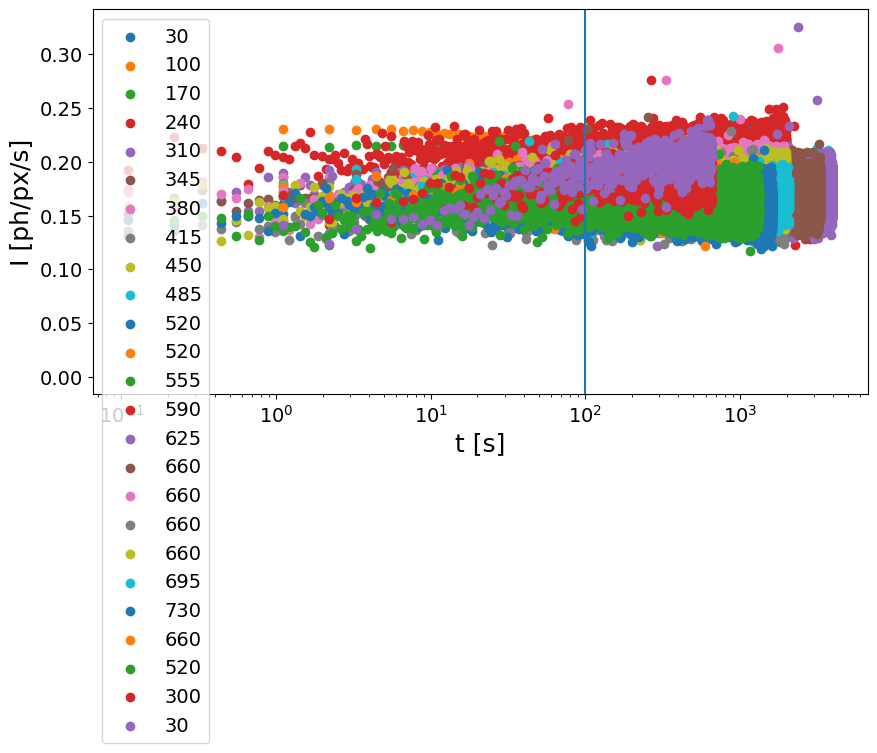

In [38]:
damage_th = 1e2

#################################################
idx_7 = scan_info[(scan_info.ID_sample==7) & (scan_info['Q']==.19) & (scan_info['test']!=True)].index
#################################################

plt.figure(figsize=(10, 5))
for idx in idx_7:
    t_It = Idts[idx]['t_It']
    It = Idts[idx]['It']
    It_avg.loc[idx] = [scan_info.loc[idx].ID_sample, scan_info.loc[idx]['T'], np.mean(It[t_It>damage_th]), np.std(It[t_It>damage_th])/np.sqrt(len(It[t_It>damage_th]))]
    plt.scatter(t_It, It, label=scan_info.loc[idx]['T'])


plt.axvline(damage_th)
plt.xlabel('t [s]')
plt.ylabel('I [ph/px/s]')
plt.legend()
plt.xscale('log')  

### GeO2_3 Temperature dependence

KeyError: 'GeO2_3_660C_0001_0004'

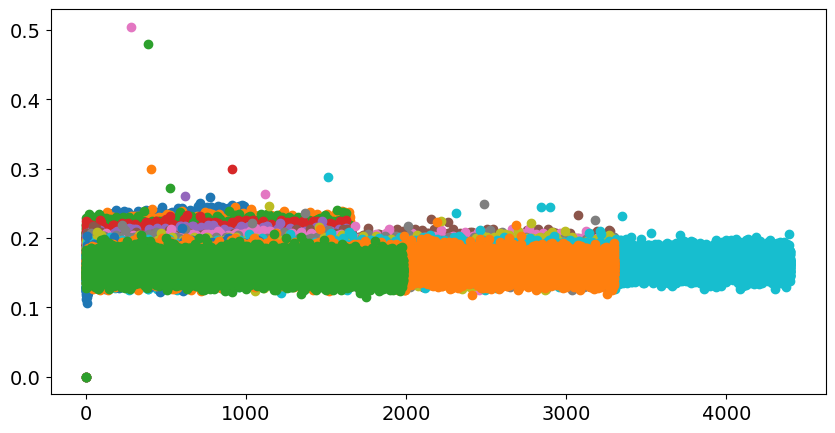

In [39]:
damage_th = 1e2

#################################################
idx_3 = scan_info[(scan_info.ID_sample==3) & (scan_info['Q']==.19) & (scan_info['test']!=True)].index
#################################################

plt.figure(figsize=(10, 5))
for idx in idx_3:
    t_It = Idts[idx]['t_It']
    It = Idts[idx]['It']
    It_avg.loc[idx] = [scan_info.loc[idx].ID_sample, scan_info.loc[idx]['T'], np.mean(It[t_It>damage_th]), np.std(It[t_It>damage_th])/np.sqrt(len(It[t_It>damage_th]))]
    plt.scatter(t_It, It, label=scan_info.loc[idx]['T'])


plt.axvline(damage_th)
plt.xlabel('t [s]')
plt.ylabel('I [ph/px/s]')
plt.legend()
plt.xscale('log')  

## Results

/tmp/ipykernel_251005/1937156381.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_6 = It_avg[(scan_info.ID_sample==6) & (scan_info['Q']==.19) & (scan_info['test']!=True)].index
/tmp/ipykernel_251005/1937156381.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_7 = It_avg[(scan_info.ID_sample==7) & (scan_info['Q']==.19) & (scan_info['test']!=True) & (scan_info['cooling']!=True) & (scan_info['fresh']!=True)].index
/tmp/ipykernel_251005/1937156381.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_7_fresh = It_avg[(scan_info.ID_sample==7) & (scan_info['Q']==.19) & (scan_info['test']!=True) & (scan_info['cooling']!=True) & (scan_info['fresh']==True)].index
/tmp/ipykernel_251005/1937156381.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx_7_cooling = It_avg[(scan_info.ID_sample==7) & (scan_info['Q']==.19) & (scan_info['test']!=True) & (scan_i

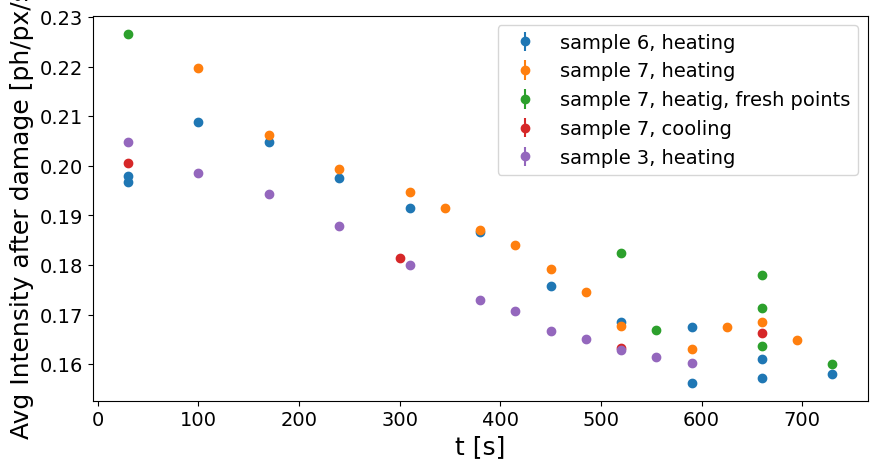

In [ ]:
#################################################

idx_6 = It_avg[(scan_info.ID_sample==6) & (scan_info['Q']==.19) & (scan_info['test']!=True)].index
idx_7 = It_avg[(scan_info.ID_sample==7) & (scan_info['Q']==.19) & (scan_info['test']!=True) & (scan_info['cooling']!=True) & (scan_info['fresh']!=True)].index
idx_7_fresh = It_avg[(scan_info.ID_sample==7) & (scan_info['Q']==.19) & (scan_info['test']!=True) & (scan_info['cooling']!=True) & (scan_info['fresh']==True)].index
idx_7_cooling = It_avg[(scan_info.ID_sample==7) & (scan_info['Q']==.19) & (scan_info['test']!=True) & (scan_info['cooling']==True) & (scan_info['fresh']!=True)].index
idx_3 = It_avg[(scan_info.ID_sample==3) & (scan_info['Q']==.19) & (scan_info['test']!=True)].index

#################################################
 
plt.figure(figsize=(10,5))

X = It_avg.loc[idx_6]
plt.errorbar(X['T'], X.It_avg, yerr=X.It_std, fmt='o', label='sample 6, heating')
X = It_avg.loc[idx_7]
plt.errorbar(X['T'], X.It_avg, yerr=X.It_std, fmt='o', label='sample 7, heating')
X = It_avg.loc[idx_7_fresh]
plt.errorbar(X['T'], X.It_avg, yerr=X.It_std, fmt='o', label='sample 7, heatig, fresh points')
X = It_avg.loc[idx_7_cooling]
plt.errorbar(X['T'], X.It_avg, yerr=X.It_std, fmt='o', label='sample 7, cooling')
X = It_avg.loc[idx_3]
plt.errorbar(X['T'], X.It_avg, yerr=X.It_std, fmt='o', label='sample 3, heating')

plt.xlabel('t [s]')
plt.ylabel('Avg Intensity after damage [ph/px/s]')
plt.legend()
